In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [2]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(23)

## Linear Classification

In [3]:
iris_data = sns.load_dataset('iris')
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
67,5.8,2.7,4.1,1.0,versicolor
3,4.6,3.1,1.5,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica


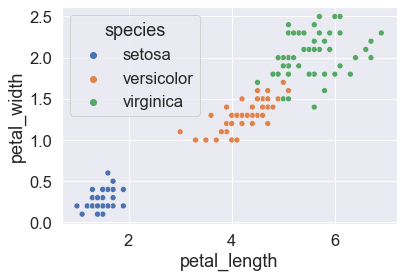

In [4]:
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species");
#fig = plt.gcf()
#fig.savefig("iris_scatter_plot_with_petal_data.png", dpi=300, bbox_inches = "tight")

In [5]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(multi_class = 'ovr')
logistic_regression_model = logistic_regression_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

logistic_regression_model_cs = LogisticRegression(multi_class = 'multinomial')
logistic_regression_model_cs = logistic_regression_model_cs.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

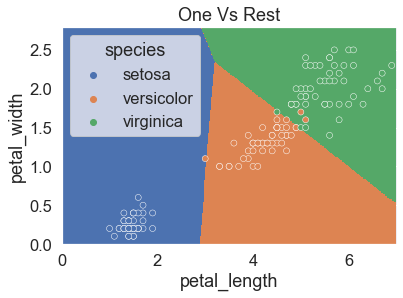

In [6]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.xlim(0, 7)
plt.ylim(0, 2.8);
plt.title("One Vs Rest");
# plt.savefig("iris_decision_boundaries_logistic_regression_no_boundaries.png", dpi=300, bbox_inches = "tight")

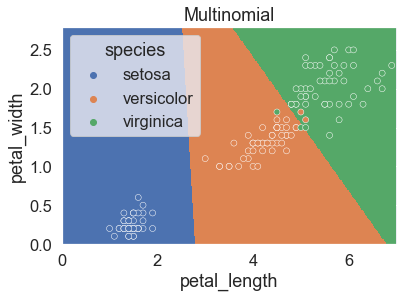

In [7]:
xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = logistic_regression_model_cs.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.title('Multinomial')
plt.xlim(0, 7)
plt.ylim(0, 2.8);

## Decision Tree Classification

In [8]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [9]:
four_random_rows = iris_data.sample(4)
four_random_rows

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
64,5.6,2.9,3.6,1.3,versicolor
137,6.4,3.1,5.5,1.8,virginica
14,5.8,4.0,1.2,0.2,setosa


In [10]:
decision_tree_model.predict(four_random_rows[["petal_length", "petal_width"]])

array(['virginica', 'versicolor', 'virginica', 'setosa'], dtype=object)

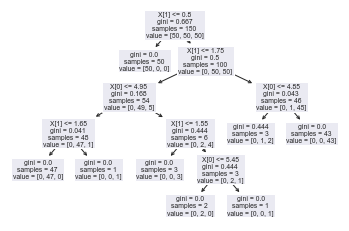

In [11]:
tree.plot_tree(decision_tree_model);

In [ ]:
#Download & Install https://graphviz.org/download/
# Installation of graphviz takes some time & effort!
import graphviz


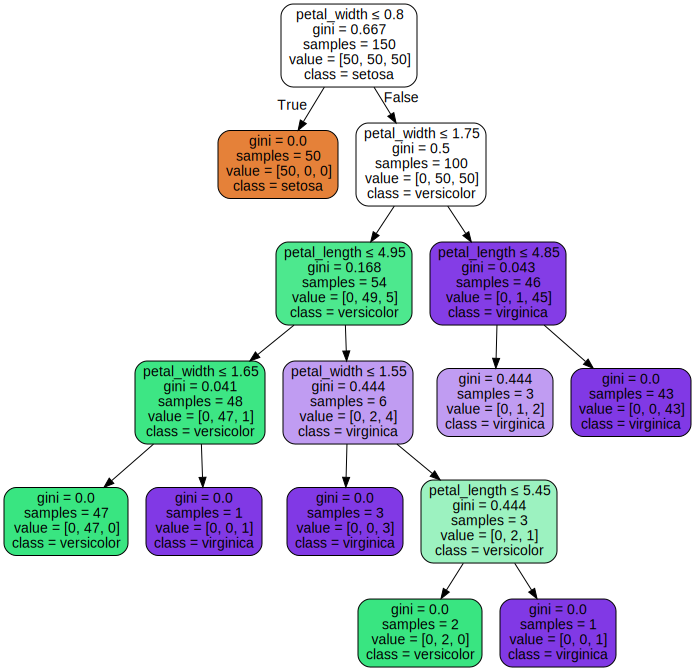

In [12]:
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                                feature_names=["petal_length", "petal_width"],  
                                class_names=["setosa", "versicolor", "virginica"],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph

(150, 2)


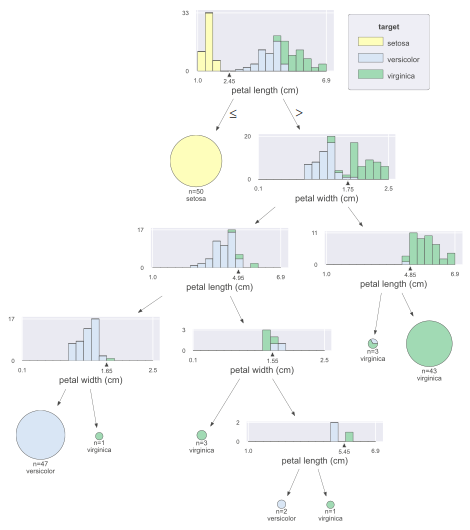

In [43]:
from dtreeviz.trees import dtreeviz # Another way to visualize your tree.
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
#iris_data[["petal_length", "petal_width"]], iris_data["species"]
# Prepare the data data
iris = datasets.load_iris()
X = iris.data[:,2:]
print(X.shape)
y = iris.target
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

viz = dtreeviz(clf, iris_data[["petal_length", "petal_width"]], y,
                target_name="target",
                feature_names=iris.feature_names[2:],
                class_names=list(iris.target_names))

viz

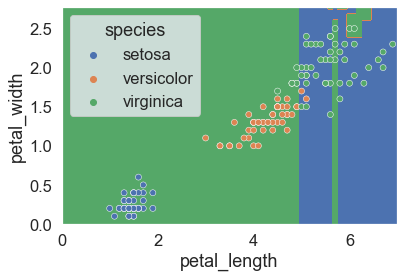

In [60]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species");

In [15]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, iris_data["species"])

0.9933333333333333

In [16]:
iris_data.query("petal_length > 2.45 and petal_width > 1.75 and petal_length <= 4.85")

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
126,6.2,2.8,4.8,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica


## Overfitting

In [17]:
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1,random_state=np.random.seed(23)), [110])

In [18]:
#sort so that the color labels match what we had in the earlier part of lecture
train_iris_data = train_iris_data.sort_values(by="species")
test_iris_data = test_iris_data.sort_values(by="species")

In [19]:
len(train_iris_data)

110

In [20]:
train_iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
46,5.1,3.8,1.6,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
17,5.1,3.5,1.4,0.3,setosa
44,5.1,3.8,1.9,0.4,setosa


In [21]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(train_iris_data[["petal_length", "petal_width"]], train_iris_data["species"])

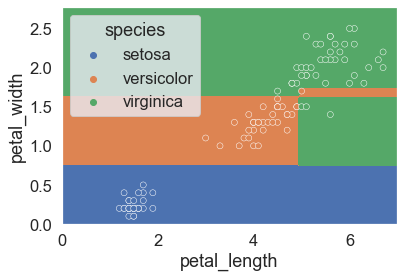

In [22]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "petal_length", y="petal_width", hue="species");

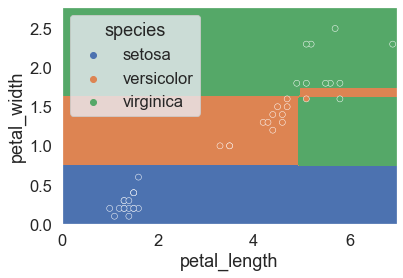

In [23]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "petal_length", y="petal_width", hue="species");
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_test_only.png", dpi=300, bbox_inches = "tight")

In [24]:
accuracy_score(decision_tree_model.predict(train_iris_data[["petal_length", "petal_width"]]), train_iris_data["species"])
#Training ACC

0.990909090909091

In [25]:
predictions = decision_tree_model.predict(test_iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, test_iris_data["species"])
#Testing ACC

0.975

In [26]:
from sklearn import tree
sepal_decision_tree_model = tree.DecisionTreeClassifier()
sepal_decision_tree_model = decision_tree_model.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])


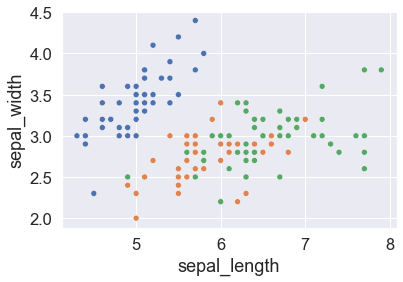

In [27]:
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False);
# fig = plt.gcf()
# fig.savefig("iris_scatter_plot_with_petal_data_sepal_only.png", dpi=300, bbox_inches = "tight")

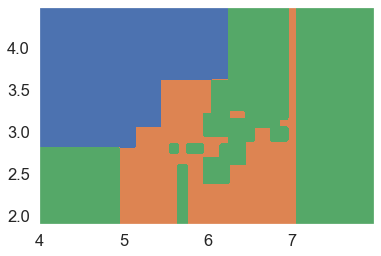

In [28]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap=sns_cmap);
# fig = plt.gcf()
# fig.savefig("iris_sepal_decision_boundaries_no_data.png", dpi=300, bbox_inches = "tight")

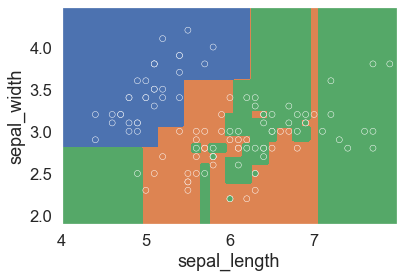

In [29]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False);
# fig = plt.gcf()
# fig.savefig("iris_sepal_decision_boundaries_model_training_only.png", dpi=300, bbox_inches = "tight")

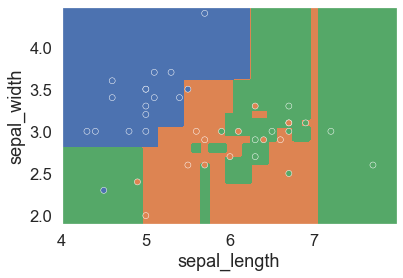

In [30]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False);
# fig = plt.gcf()
# fig.savefig("iris_sepal_decision_boundaries_model_test_only.png", dpi=300, bbox_inches = "tight")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split.png", dpi=300, bbox_inches = "tight")

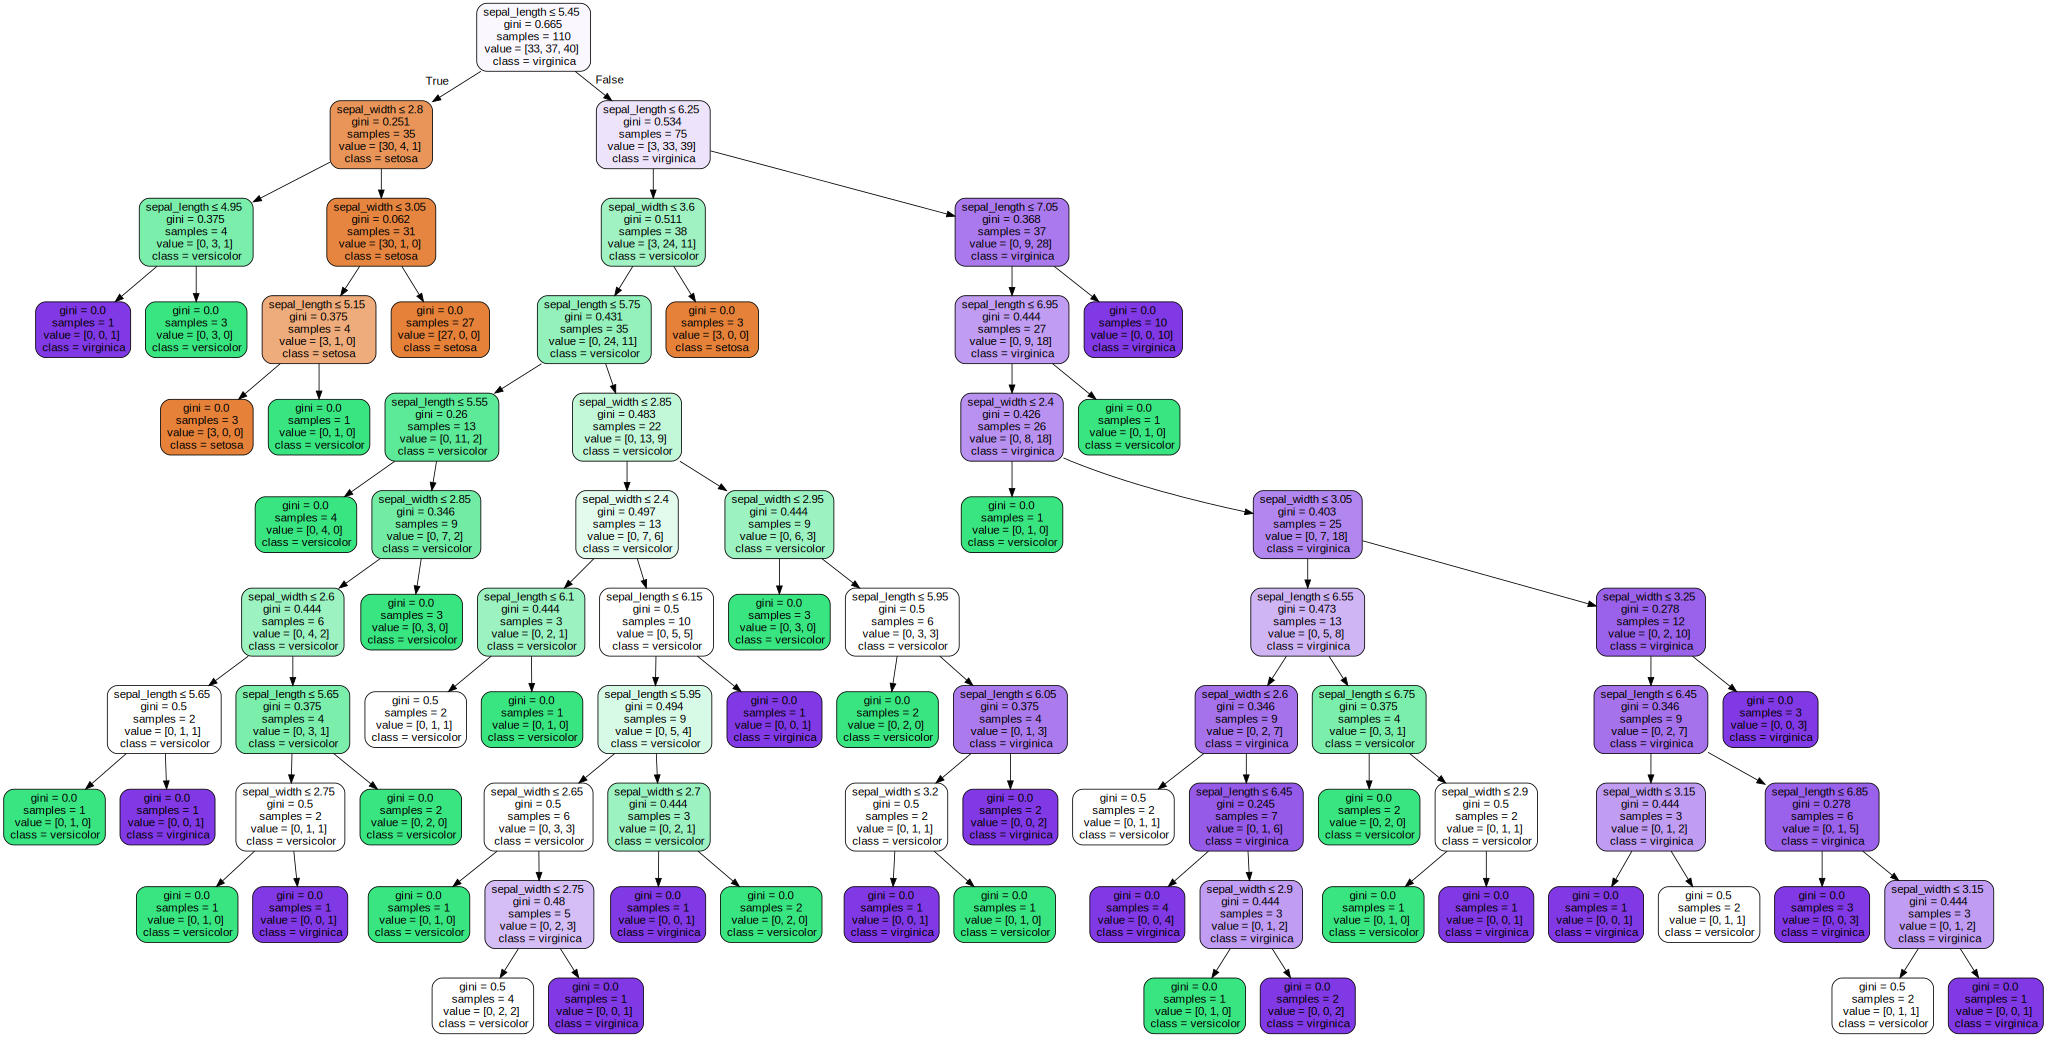

In [61]:
dot_data = tree.export_graphviz(sepal_decision_tree_model, out_file=None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
# graph.render(format="png", filename="sepal_tree")
graph

In [31]:
accuracy_score(sepal_decision_tree_model.predict(train_iris_data[["sepal_length", "sepal_width"]]), train_iris_data["species"])
#Training Acc

0.9454545454545454

In [32]:
accuracy_score(sepal_decision_tree_model.predict(test_iris_data[["sepal_length", "sepal_width"]]), test_iris_data["species"])
#Testing Acc

0.675

In [33]:
decision_tree_model_4d = tree.DecisionTreeClassifier()
decision_tree_model_4d = decision_tree_model_4d.fit(train_iris_data[["petal_length", "petal_width", 
                                                                     "sepal_length", "sepal_width"]], train_iris_data["species"])

In [34]:
predictions = decision_tree_model_4d.predict(train_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, train_iris_data["species"])

1.0

In [35]:
predictions = decision_tree_model_4d.predict(test_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, test_iris_data["species"])

0.95

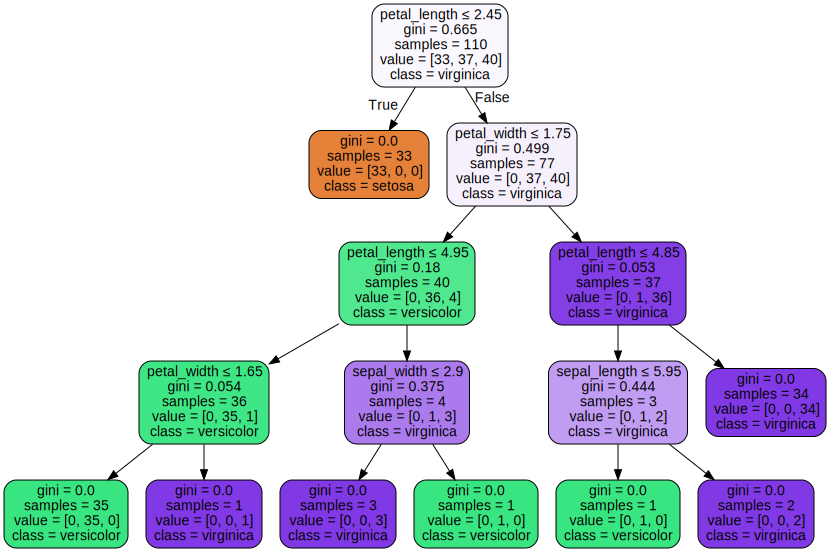

In [69]:
dot_data = tree.export_graphviz(decision_tree_model_4d, out_file=None, 
                      feature_names=["petal_length", "petal_width", "sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

## Creating Decision Tree

In [13]:
def entropy(x):
    normalized_x = x / np.sum(x)
    return sum(-normalized_x * np.log2(normalized_x))

In [14]:
entropy([34, 36, 40])

1.581649163979848

In [15]:
entropy([50, 50])

1.0

In [16]:
entropy([149, 1])

0.05777796017013378

In [17]:
def weighted_average_entropy(x1, x2):
    N1 = sum(x1)
    N2 = sum(x2)
    N = N1/(N1 + N2)
    return (N1 * entropy(x1) + N2 * entropy(x2)) / (N1 + N2)

In [18]:
weighted_average_entropy([50, 46, 3], [4, 47])

0.9033518322003758

In [19]:
weighted_average_entropy([50, 50], [50])

0.6666666666666666

### Random Forest

In [20]:
ten_decision_tree_models = []
ten_training_sets = []
for i in range(10):
    current_model = tree.DecisionTreeClassifier()
    temp_iris_training_data, temp_iris_test_data = np.split(iris_data.sample(frac=1), [110])
    temp_iris_training_data = temp_iris_training_data.sort_values("species")
    current_model.fit(temp_iris_training_data[["sepal_length", "sepal_width"]], temp_iris_training_data["species"])
    ten_decision_tree_models.append(current_model)
    ten_training_sets.append(temp_iris_training_data)

In [21]:
def plot_decision_tree(decision_tree_model, data = None, disable_axes = False):
    from matplotlib.colors import ListedColormap
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

    xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

    Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse=True)
    Z_int = Z_int.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
    if data is not None:
        sns.scatterplot(data = data, x = "sepal_length", y="sepal_width", hue="species", legend=False)

    if disable_axes:
        plt.axis("off")
#    if disable_axes:
#        
#        plt.gca().xaxis.label.set_visible(False)
#        plt.gca().yaxis.label.set_visible(False)  

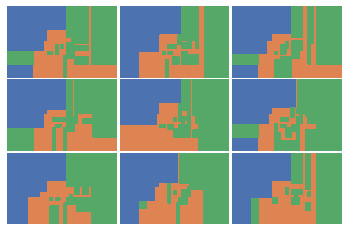

In [22]:
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 
importances = []
for i in range(0, 9):
    plt.subplot(gs1[i]) #3, 3, i)
    plot_decision_tree(ten_decision_tree_models[i], None, True)
    #print(ten_decision_tree_models[i].feature_importances_)
    importances.append(ten_decision_tree_models[i].feature_importances_)

<AxesSubplot:>

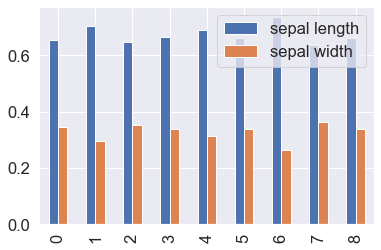

In [23]:
#print(importances)
forest_importances = pd.DataFrame(importances, columns=["sepal length","sepal width"])
forest_importances.plot.bar()

In [24]:
df_feature_long = pd.melt(forest_importances,var_name='feature name', value_name='values')
print(df_feature_long)

    feature name    values
0   sepal length  0.656128
1   sepal length  0.705182
2   sepal length  0.648911
3   sepal length  0.663512
4   sepal length  0.688441
5   sepal length  0.662745
6   sepal length  0.735770
7   sepal length  0.637971
8   sepal length  0.662065
9    sepal width  0.343872
10   sepal width  0.294818
11   sepal width  0.351089
12   sepal width  0.336488
13   sepal width  0.311559
14   sepal width  0.337255
15   sepal width  0.264230
16   sepal width  0.362029
17   sepal width  0.337935


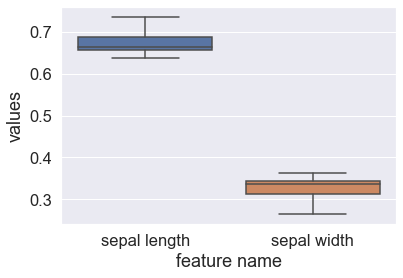

In [25]:
sns.boxplot(x="feature name", y="values", data=df_feature_long);

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=100,max_features=2)
###Check Documentation
clf.fit(temp_iris_training_data[["sepal_length", "sepal_width","petal_length","petal_width"]],temp_iris_training_data["species"])


RandomForestClassifier(max_depth=3, max_features=2, random_state=0)

In [27]:
df_feature_importance = pd.DataFrame(clf.feature_importances_, index=["sepal_length", "sepal_width","petal_length","petal_width"],
                                     columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance
###Averaged Importance

,feature importance
petal_length,0.457088
petal_width,0.449037
sepal_length,0.067201
sepal_width,0.026674


In [28]:
df_feature_all = pd.DataFrame([tree.feature_importances_ for tree in clf.estimators_], columns=df_feature_importance.index)
df_feature_all.head()
df_feature_long = pd.melt(df_feature_all,var_name='feature name', value_name='values')

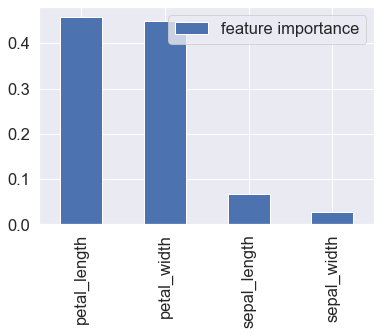

In [29]:
df_feature_importance.plot(kind='bar');